In [ ]:
%pip install scikit-learn imbalanced-learn

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.over_sampling import SMOTE


In [8]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [19]:
#Scikitlearn Pipeline for Evaluation  
base_svc = Pipeline([
    ("scaler", RobustScaler()),
    ("svm", SVC(probability=True))
])


In [20]:
#Bagging and Hyperparameter Tuning
bagged_model = BaggingClassifier(estimator=base_svc, n_estimators=10, max_samples=0.8, random_state=42)

param_grid = {
    "estimator__svm__C": [0.1, 1, 10],
    "estimator__svm__gamma": [0.01, 0.1, 1],
    "estimator__svm__kernel": ["rbf", "poly"]
}

In [21]:
grid_search = GridSearchCV(bagged_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[[97  3]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.97      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



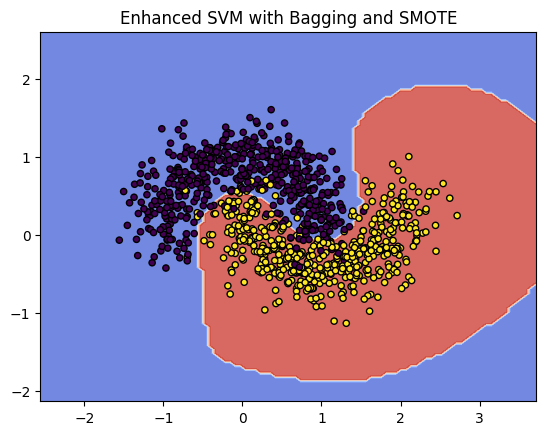

In [22]:
DecisionBoundaryDisplay.from_estimator(
    grid_search.best_estimator_,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title("Enhanced SVM with Bagging and SMOTE")
plt.show()